X =  tensor([[ 1.2267, -0.0179],
        [ 1.1463, -0.0295],
        [-0.9409,  1.2525],
        ...,
        [ 1.5663,  1.1872],
        [ 0.9424,  1.2376],
        [-0.8457,  0.0446]])
X.shape =  torch.Size([1000, 2])
y =  tensor([ 6.7150e+00,  6.6128e+00, -1.9338e+00,  7.5302e-01, -2.6107e+00,
         4.1209e+00,  3.0051e-02,  5.8916e+00,  2.3290e+00,  4.2739e+00,
        -9.4969e-01,  3.3924e-02,  7.3660e+00,  1.2150e+00,  3.4441e+00,
         8.9565e+00,  3.4051e+00,  1.9833e+00,  4.8723e+00,  7.4055e+00,
         2.4237e+00,  1.0997e+00,  1.4928e+01, -2.5463e+00,  8.8039e+00,
         4.7103e+00,  1.4513e+00,  6.8585e+00,  7.5389e+00,  3.6885e+00,
         4.3094e+00,  1.9614e+00,  4.4559e+00,  7.5512e+00,  2.9392e+00,
         2.2837e+00, -4.4028e-01,  4.3292e+00, -2.9406e+00,  5.9812e+00,
        -9.5599e-01,  3.8075e+00,  8.3016e+00,  9.9015e+00,  6.2889e+00,
         1.2780e+01,  7.5198e+00,  6.6889e+00,  5.2202e+00,  5.1947e+00,
         7.9529e-01,  9.1206e+00,  9.5471e+00

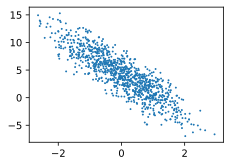

In [4]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

def synthetic_data(w, b, num_examples):
    '''
    Generate y = Xw + b + noise
    '''
    X = torch.normal(0, 1, (num_examples, len(w)))
    # The mean value is 0, the satndard deviation is 1, 
    # row is num_examples, column is len(w)
    y = torch.matmul(X,w) + b
    y += torch.normal(0, 0.01, y.shape)
    # y :  1000 row and 1 column (one dimension)
    print("X = ", X)
    print("X.shape = ", X.shape)
    print("y = ", y)
    print("y.shape = ", y.shape)
    print("y.reshape((-1, 1)) = ", y.reshape((-1, 1)))
    print("y.reshape.shape = ", y.reshape((-1, 1)).shape)
    return X, y.reshape((-1, 1))
    # -1 auto calculate, 

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print('feature:', features[0], '\nlabel:', labels[0])

d2l.set_figsize()
d2l.plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)


In [3]:
print(len(features))

1000


In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    # For features.size = torch.Size([1000, 2]), len = 1000
    indices = list(range(num_examples))
    # indices = [0, 1, 2, ..., 999]
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        # i += batch_size
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        # batch_indices = tensor([indices[i], indices[i + 1], ..., indices[min(i + batch_size, num_examples)]])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
count = 1

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y, "count = ", count)
    count+=1


tensor([[-0.0284, -0.6753],
        [-0.8388, -0.1140],
        [ 0.2026,  1.5634],
        [ 0.4542,  1.4544],
        [ 0.5992, -0.3964],
        [ 0.2085,  1.4398],
        [-0.1857,  0.7193],
        [-0.6365,  1.2856],
        [ 0.3272, -0.7961],
        [ 0.5407, -0.3309]]) 
 tensor([[ 6.4320],
        [ 2.9123],
        [-0.7180],
        [ 0.1702],
        [ 6.7414],
        [-0.2796],
        [ 1.3913],
        [-1.4445],
        [ 7.5517],
        [ 6.3970]]) count =  1
tensor([[-1.4109,  0.7530],
        [ 0.9033,  1.1161],
        [-0.5330, -1.0614],
        [ 0.6674, -0.2201],
        [-1.1440,  0.4153],
        [ 1.0350,  1.9547],
        [ 1.5637, -1.9440],
        [-1.2919,  0.1030],
        [ 0.5832, -1.1714],
        [-0.6299,  0.7994]]) 
 tensor([[-1.1947],
        [ 2.2006],
        [ 6.7535],
        [ 6.3032],
        [ 0.4988],
        [-0.3906],
        [13.9359],
        [ 1.2668],
        [ 9.3340],
        [ 0.2266]]) count =  2
tensor([[ 0.4412,  0.5867],
  

 tensor([[ 6.3207],
        [-0.9754],
        [ 3.8114],
        [ 3.6579],
        [ 4.9241],
        [ 5.0804],
        [ 2.3290],
        [ 9.3082],
        [12.4624],
        [ 8.2639]]) count =  44
tensor([[-4.0688e-01,  1.7624e+00],
        [ 1.9825e-01,  8.6271e-01],
        [-6.1281e-01, -1.7808e-01],
        [ 3.4418e-01,  1.2972e+00],
        [ 5.3124e-01, -5.1051e-02],
        [ 4.2269e-01,  4.0229e-01],
        [ 6.8008e-01,  1.4955e+00],
        [-1.6499e-01,  9.5408e-04],
        [-1.7773e-01, -1.1990e+00],
        [-2.7966e-01, -7.9417e-01]]) 
 tensor([[-2.6027],
        [ 1.6529],
        [ 3.5621],
        [ 0.4831],
        [ 5.4347],
        [ 3.6885],
        [ 0.4870],
        [ 3.8641],
        [ 7.9282],
        [ 6.3585]]) count =  45
tensor([[-0.2113,  0.6139],
        [ 0.6012, -0.7948],
        [-1.3774, -0.4376],
        [-0.2381, -0.2042],
        [ 0.1197,  1.7034],
        [ 0.8751,  1.2889],
        [-0.0948,  0.2759],
        [ 0.6332, -1.2763],
      

tensor([[-2.4088,  1.2646],
        [-1.9475, -0.1502],
        [ 1.4365,  0.5347],
        [ 2.1359, -0.7192],
        [-0.9723,  0.4399],
        [ 0.0352,  0.9581],
        [-1.5658,  0.3021],
        [ 2.1767, -0.7063],
        [ 0.4115,  0.0078],
        [-0.6206,  0.8780]]) 
 tensor([[-4.9110],
        [ 0.8239],
        [ 5.2519],
        [10.9290],
        [ 0.7411],
        [ 1.0236],
        [ 0.0313],
        [10.9468],
        [ 4.9979],
        [-0.0155]]) count =  90
tensor([[-1.3366,  0.1018],
        [-1.3847,  0.2437],
        [-1.7505,  0.4847],
        [-0.4284, -0.8368],
        [ 0.1717,  0.6033],
        [ 0.4418, -0.5391],
        [-1.8966,  1.0604],
        [-0.8662,  0.3638],
        [ 0.3119, -0.3491],
        [-0.2549,  0.0183]]) 
 tensor([[ 1.1868],
        [ 0.6236],
        [-0.9499],
        [ 6.1834],
        [ 2.4988],
        [ 6.9123],
        [-3.2046],
        [ 1.2368],
        [ 6.0190],
        [ 3.6203]]) count =  91
tensor([[ 2.3352,  1.0800],
